In [5]:
import matplotlib.pyplot as plt
import numpy as np
from  general_chemistry import *

In [6]:
#A = 0.00001
CO2 = 0.00
CO2_influx_s = 0.0001
H2CO3 = 0 

time_step = 0.001
time_s = 100
start_pH = 7.4
fluorescein_concentration = 0.00005
fluorescein_pKa = 6.4

A_name = "CO2"
B_name = "HCO3-"

k_CO2_HCO3 = 0.039 ## first order
k_HCO3_CO2 = 23 ## first order
k_H_FluoH = 4000000000 #second order
k_FluoH_H = 25000 ## first order

k_reaction = k_CO2_HCO3/ k_HCO3_CO2
equilibrium_point = k_reaction * (CO2 + H2CO3)

In [7]:
t=0
steps = time_s / time_step
fluo, fluoH = pKa_to_conc(fluorescein_pKa, start_pH, fluorescein_concentration)
fluo_init = fluo
fluoH_init = fluoH



pH = start_pH
active_fluorescein = fluo / fluorescein_concentration *100
reaction = [[t,CO2,H2CO3,pH, active_fluorescein]]

H3O_last= 0
for i in range(int(steps)):

    #New CO2 in the system
    CO2 = CO2 + CO2_influx_s * time_step
   
    ## CO2 hydration/dehydration
    CO2 , H2CO3 = first_order_reaction(CO2, H2CO3, k_CO2_HCO3, time_step)
    H2CO3 , CO2 =  first_order_reaction(H2CO3, CO2, k_HCO3_CO2 , time_step)

    # H2CO3 dissociate according to its pKa
    #H3O, H2CO3 = pKa_to_conc(6.1, pH, H2CO3) 
    H3O = H2CO3
    H3O_last = H3O
    ##update fluorescein state
    fluo = fluo_init - H3O
    fluoH = fluoH_init + H3O
    pH = fluorescein_pKa + np.log10((fluo/fluoH))
    

    active_fluorescein = fluo / fluorescein_concentration *100

    t = t + time_step
    reaction.append([t,CO2,H2CO3,pH,active_fluorescein])
    

reaction = np.array(reaction)
#reaction = np.round(reaction,4)

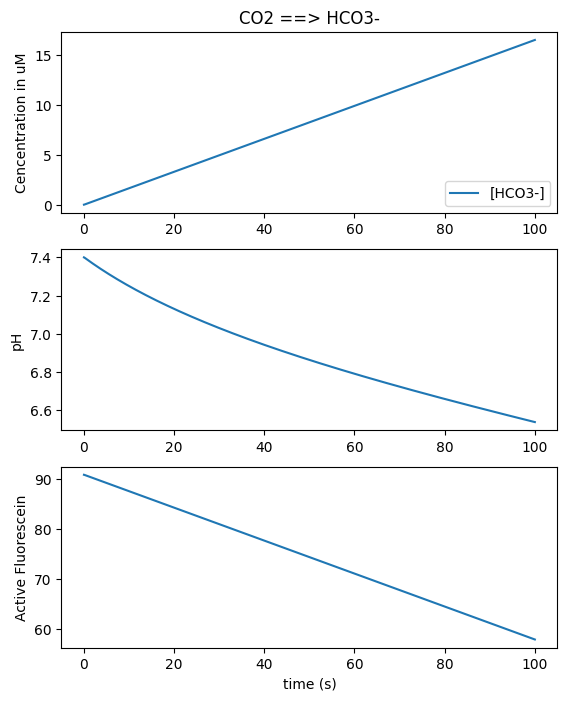

In [8]:

#start_proton = pH_to_proton(start_pH)
#pH_list = np.vstack((reaction[:,0], proton_to_pH(reaction[:,2]+start_proton))).T


fig, ax = plt.subplots(3,1)
fig.set_figheight(8)
#ax.plot(reaction[:,0], reaction[:,1], label=f'[{A_name}]')
ax[0].plot(reaction[:,0], reaction[:,2]*1000000, label=f'[{B_name}]')
ax[0].legend(loc='lower right' )
ax[0].set( ylabel='Cencentration in uM', title=f"{A_name} ==> {B_name}")

ax[1].plot(reaction[:,0], reaction[:,3])
ax[1].set(ylabel= "pH")

ax[2].plot(reaction[:,0], reaction[:,4])
ax[2].set(xlabel='time (s)', ylabel="Active Fluorescein")



plt.show()
